In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_auc_score


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("bank/bank.csv",sep=';' )
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [4]:
#Categorical Data
print(data.job.unique())
print(data.marital.unique())
print(data.education.unique())
print(data.default.unique())
print(data.housing.unique())
print(data.loan.unique())
print(data.contact.unique())
print(data.month.unique())
print(data.poutcome.unique())

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
['married' 'single' 'divorced']
['primary' 'secondary' 'tertiary' 'unknown']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['cellular' 'unknown' 'telephone']
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
['unknown' 'failure' 'other' 'success']


In [5]:
#CALCULATING DUMMY VALUES FOR CATEGORICAL DATA

In [6]:
job_dummy = pd.get_dummies(data['job'])
marital_dummy = pd.get_dummies(data['marital'])
education_dummy = pd.get_dummies(data['education'])
default_dummy = pd.get_dummies(data['default'])
housing_dummy = pd.get_dummies(data['housing'])
loan_dummy = pd.get_dummies(data['loan'])
contact_dummy = pd.get_dummies(data['contact'])
# day_dummy = pd.get_dummies(data['day'])
month_dummy = pd.get_dummies(data['month'])
poutcome_dummy = pd.get_dummies(data['poutcome'])
# y_dummy = pd.get_dummies(data['y'])

In [7]:
#ADDING DUMMY VALUES TO THE DATA

In [8]:
data = pd.concat([data,job_dummy], axis=1, sort=False)
data = pd.concat([data,marital_dummy], axis=1, sort=False)
data = pd.concat([data,education_dummy], axis=1, sort=False)
data = pd.concat([data,default_dummy], axis=1, sort=False)
data = pd.concat([data,housing_dummy], axis=1, sort=False)
data = pd.concat([data,loan_dummy], axis=1, sort=False)
data = pd.concat([data,contact_dummy], axis=1, sort=False)
# data = pd.concat([data,day_dummy], axis=1, sort=False)
data = pd.concat([data,month_dummy], axis=1, sort=False)
data = pd.concat([data,poutcome_dummy], axis=1, sort=False)
# data = pd.concat([data,y_dummy], axis=1, sort=False)

In [9]:
#DROP ROWS WHOSE CATEGORICAL DATA HAS BEEN ADDED

In [10]:
data = data.drop('job',axis=1)
data = data.drop('marital',axis=1)
data = data.drop('education',axis=1)
data = data.drop('default',axis=1)
data = data.drop('housing',axis=1)
data = data.drop('loan',axis=1)
data = data.drop('contact',axis=1)
data = data.drop('month',axis=1)
data = data.drop('poutcome',axis=1)

In [11]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,30,1787,19,79,1,-1,0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,no,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,no,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1


In [12]:
#SEPARATING PREDICTORS AND RESPONSE

In [13]:
df = data
df = df.drop('y',axis=1);

In [14]:
# y IS THE RESPONSE IN THIS DATASET
y=data['y']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [15]:
#PLOT CORRELATION BETWEEN ATTRIBUTES

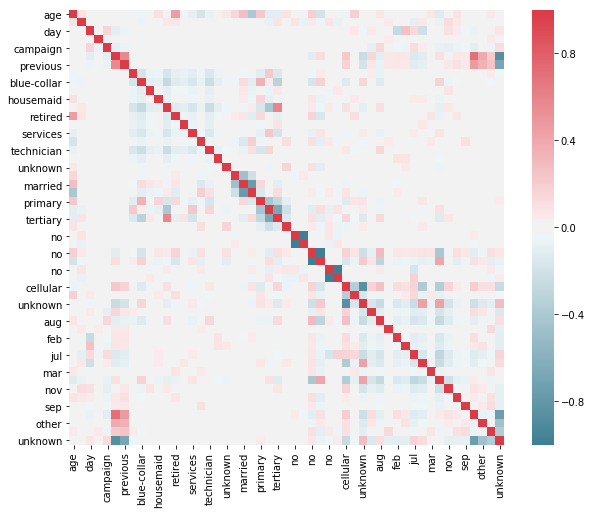

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [17]:
#SPLITTING INTO TRAINING AND TESTING DATA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=101)

In [19]:
#KNN RUNNING

In [20]:
from sklearn.neighbors import KNeighborsClassifier
error_rate_train = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate_train.append(np.mean(pred_i != y_train))
    
error_rate_test = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate_test.append(np.mean(pred_i != y_test))
    

Text(0,0.5,'Error Rate')

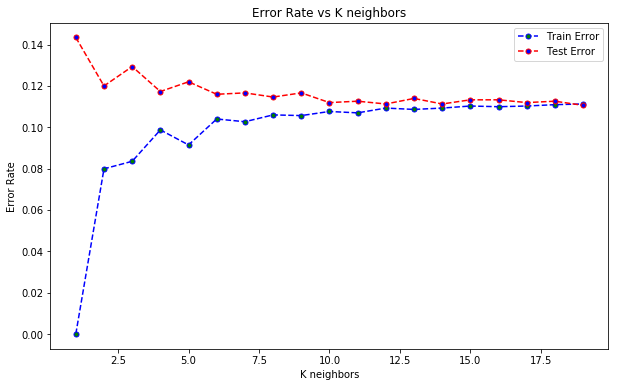

In [21]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Error Rate vs K neighbors')
plt.xlabel('K neighbors')
plt.ylabel('Error Rate')

In [22]:
# KNN FOR 6 NEIGHBOURS

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
print('Accuracy = ',knn.score(X_test,y_test)) #Mean Accuracy
y_pred=knn.predict(X_test)


print('\nconfusion matrix\n',confusion_matrix(y_test, y_pred))
print('\nclassification report\n',classification_report(y_test, y_pred))


Accuracy =  0.8840482573726541

confusion matrix
 [[1301   23]
 [ 150   18]]

classification report
              precision    recall  f1-score   support

         no       0.90      0.98      0.94      1324
        yes       0.44      0.11      0.17       168

avg / total       0.85      0.88      0.85      1492



In [25]:
y_test_bin = y_test
y_test_bin = y_test_bin.map({'no':0,'yes':1})
y_pred_bin = y_pred
y_pred_bin = pd.Series(data=y_pred) 
y_pred_bin = y_pred_bin.map({'no':0,'yes':1})

Area under graph =  0.544885627967199


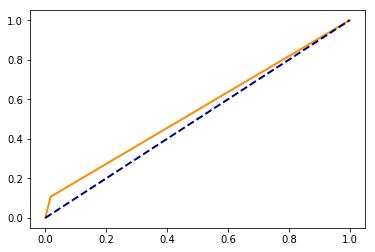

In [26]:
#AUC GRAPH

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr,tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)
print('Area under graph = ',roc_auc)

In [27]:
# DECISION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier
error_rate_train = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i = dTree.predict(X_train)
    error_rate_train.append(np.mean(pred_i != y_train))
    
error_rate_test = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i = dTree.predict(X_test)
    error_rate_test.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

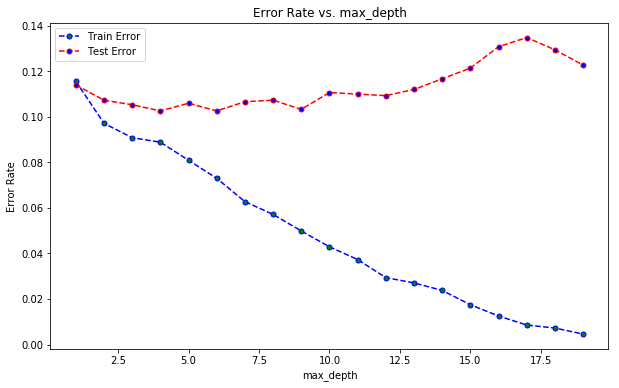

In [29]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [30]:
dTree = DecisionTreeClassifier(max_depth=6)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
print('Mean Accuracy\n',dTree.score(X_test,y_test))
print('\nconfusion matrix\n',confusion_matrix(y_test, y_pred))
print('\nclassification report\n',classification_report(y_test, y_pred))

Mean Accuracy
 0.8981233243967829

confusion matrix
 [[1301   23]
 [ 150   18]]

classification report
              precision    recall  f1-score   support

         no       0.90      0.98      0.94      1324
        yes       0.44      0.11      0.17       168

avg / total       0.85      0.88      0.85      1492



In [32]:
y_pred=dTree.predict(X_test)

In [33]:
y_test_bin = y_test
y_test_bin = y_test_bin.map({'no':0,'yes':1})
y_pred_bin = y_pred
y_pred_bin = pd.Series(data=y_pred) 
y_pred_bin = y_pred_bin.map({'no':0,'yes':1})

Area under graph =  0.6567580204287153


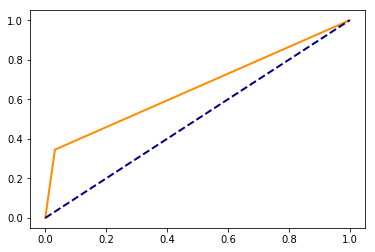

In [34]:
#AUC GRAPH

fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr,tpr, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)
print('Area under graph = ',roc_auc)

In [35]:
# RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,criterion="entropy")
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
print('Accuracy\n',rf.score(X_test,y_test))
y_pred=rf.predict(X_test)
print('\nConfusion Matrix\n',confusion_matrix(y_test, y_pred))
print('\nClassification Report\n',classification_report(y_test, y_pred))

Accuracy
 0.8981233243967829

Confusion Matrix
 [[1302   22]
 [ 130   38]]

Classification Report
              precision    recall  f1-score   support

         no       0.91      0.98      0.94      1324
        yes       0.63      0.23      0.33       168

avg / total       0.88      0.90      0.88      1492



In [38]:
y_test_bin = y_test
y_test_bin = y_test_bin.map({'no':0,'yes':1})
y_pred_bin = y_pred
y_pred_bin = pd.Series(data=y_pred) 
y_pred_bin = y_pred_bin.map({'no':0,'yes':1})




Area under graph =  0.6047870809955402


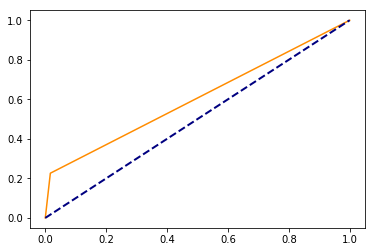

In [39]:
#AUC GRAPH
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)
print('Area under graph = ',roc_auc)

In [40]:
#BAGGING 
from sklearn.ensemble import BaggingClassifier

In [41]:

bag_depth5 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5 , criterion = 'entropy'), n_estimators=10, n_jobs=-1, random_state=1)

In [42]:
bag_depth5.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [43]:
print('Mean Accuracy\n',bag_depth5.score(X_test,y_test))
y_pred=bag_depth5.predict(X_test)
print('\nconfusion matrix\n',confusion_matrix(y_test, y_pred))
print('\nclassification report\n',classification_report(y_test, y_pred))

Mean Accuracy
 0.8927613941018767

confusion matrix
 [[1285   39]
 [ 121   47]]

classification report
              precision    recall  f1-score   support

         no       0.91      0.97      0.94      1324
        yes       0.55      0.28      0.37       168

avg / total       0.87      0.89      0.88      1492



In [44]:
bag_depth40 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=40 , criterion = 'entropy'), n_estimators=10, n_jobs=-1, random_state=1)

In [45]:
bag_depth40.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [46]:
print('Mean Accuracy\n',bag_depth40.score(X_test,y_test))
y_pred=bag_depth40.predict(X_test)
print('\nconfusion matrix\n',confusion_matrix(y_test, y_pred))
print('\nclassification report\n',classification_report(y_test, y_pred))

Mean Accuracy
 0.8967828418230563

confusion matrix
 [[1273   51]
 [ 103   65]]

classification report
              precision    recall  f1-score   support

         no       0.93      0.96      0.94      1324
        yes       0.56      0.39      0.46       168

avg / total       0.88      0.90      0.89      1492

